<a href="https://colab.research.google.com/github/YejinShin1/god_yes_jeans/blob/master/%EA%B2%BD%EB%B3%B5%EA%B6%81_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/tr

In [ ]:
import os
import glob
import pandas as pd
import konlpy.tag
from konlpy.tag import Okt
import re 

tokenizer = Okt()

In [ ]:
import copy

def preprocess(input_string, stopwords = [], mode = None):
    hangul = re.compile('[^ ㄱ-ㅎㅏ-ㅣ가-힣]+')
    mid = hangul.sub('', input_string)
    mid = re.sub('\s+',' ', mid )
    if mid == "" or mid == " ":
        return None
    pos_tagged = tokenizer.pos(mid)
    mid = []
    for word, tag in pos_tagged:
        if not word in stopwords and len(word)>1:
            mid.append([word, tag])
    content = []
    if mode == None:
        for word, tag in mid:
            if tag.startswith('N'):
                content.append(word)
    else:
        for word, tag in mid:
            if tag.startswith(mode):
                content.append(word)
    
    return content

In [ ]:
def get_cleaned_texts(dataFrame, stopwords = [], mode = None):
    cleaned_texts_token = []
    cleaned_texts_sentences = []
    for text in dataFrame[:]['review'].array:
        if type(text) != type(""):
            if np.isnan(text):
                continue
            print(text)
            print(type(text))
        cleaned_text = preprocess(text, stopwords, mode = mode)
        if cleaned_text == None:
            continue
        cleaned_texts_token.extend(cleaned_text)
        cleaned_text = " ".join(cleaned_text)
        cleaned_texts_sentences.append(cleaned_text)
    return cleaned_texts_token, cleaned_texts_sentences

In [ ]:
from collections import Counter 
def get_word_count(word_list):
    word_count = Counter(word_list)
    print(sorted(word_count.items(), key = lambda x : x[1], reverse = True))
    return word_count

In [ ]:
from wordcloud import WordCloud
font_path = r"'/usr/share/fonts/truetype/nanum/NanumSquareB.ttf"
def draw_word_cloud(word_count):
    wordcloud1 = WordCloud(
        font_path = font_path,
        width = 800,
        height = 800,
        background_color="white",
    )
    pos_wordcloud = wordcloud1.generate_from_frequencies(word_count)

    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.imshow(pos_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
df = pd.read_csv('data_서울.csv')
df.head()

,지역,loc,score,review
0,서울,경복궁,50,날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해지는 기분이라고 할까요? ...
1,서울,경복궁,50,Goooooood 다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고 먹을거리도많...
2,서울,경복궁,50,요새 더더욱 코로나로 인해 사람 방문이 적음. 두자녀 동반시 성인 입장무료. 지금 ...
3,서울,경복궁,50,조선 개국 4년째인 1395년에 처음으로 세운 으뜸 궁궐이다. '하늘이 내린 큰 ...
4,서울,경복궁,50,"한국 건축물의 아름다움을 느낄 수 있는 곳이고, 한복을 입었을 때 입장료는 무료. ..."


In [ ]:
df['boolean'] = df['score']>30 

In [ ]:
df['Label'] = df.boolean.map({True:1, False:0})
df

,지역,loc,score,review,boolean,Label
0,서울,경복궁,50,날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해지는 기분이라고 할까요? ...,True,1
1,서울,경복궁,50,Goooooood 다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고 먹을거리도많...,True,1
2,서울,경복궁,50,요새 더더욱 코로나로 인해 사람 방문이 적음. 두자녀 동반시 성인 입장무료. 지금 ...,True,1
3,서울,경복궁,50,조선 개국 4년째인 1395년에 처음으로 세운 으뜸 궁궐이다. '하늘이 내린 큰 ...,True,1
4,서울,경복궁,50,"한국 건축물의 아름다움을 느낄 수 있는 곳이고, 한복을 입었을 때 입장료는 무료. ...",True,1
...,...,...,...,...,...,...
295,서울,경복궁,50,내국인이던 외국인이면 한국에 왔다면 꼭 가봐야합니다. 대한민국 이전의 역사를 가지고...,True,1
296,서울,경복궁,50,고즈넉하고 화려한 경복궁의 산책은 옛날이면 감히 꿈도 꾸지 못했을 왕궁에서 생활을 ...,True,1
297,서울,경복궁,50,낮이나 밤이나 항상 아름다운 경복궁 고풍스러운 궁의 멋을 느낄수 있었습니다 연령 성...,True,1
298,서울,경복궁,50,언제 가도 예쁘고 한국의 기운이 물씬 느껴지는 곳이에요~바쁜 서울 한복판에 잘 어울...,True,1


In [ ]:
review_total_token, review_total_sentence = get_cleaned_texts(df)

[('경복궁', 154), ('한복', 122), ('방문', 85), ('야간', 81), ('사람', 64), ('개장', 61), ('한국', 59), ('외국인', 55), ('경회루', 49), ('추천', 47), ('무료', 46), ('서울', 41), ('시간', 41), ('궁궐', 38), ('입장', 37), ('가면', 34), ('친구', 33), ('한번', 32), ('생각', 31), ('사진', 31), ('모습', 31), ('역사', 30), ('입장료', 29), ('가족', 29), ('전통', 26), ('관람', 25), ('건물', 25), ('정말', 25), ('고궁', 25), ('산책', 23), ('가장', 23), ('느낌', 23), ('조선', 22), ('가을', 21), ('구경', 20), ('주변', 19), ('여행', 19), ('장소', 19), ('날씨', 17), ('박물관', 17), ('때문', 17), ('우리나라', 17), ('우리', 17), ('공연', 17), ('관광지', 16), ('대여', 16), ('외국', 16), ('가도', 16), ('다른', 16), ('근처', 15), ('관광객', 15), ('찍기', 15), ('대표', 15), ('하나', 15), ('최고', 14), ('도심', 14), ('보고', 14), ('정도', 14), ('매우', 14), ('광화문', 13), ('아이', 13), ('행사', 13), ('조명', 13), ('미리', 13), ('설명', 13), ('공간', 12), ('항상', 12), ('풍경', 12), ('나들이', 11), ('라면', 11), ('볼거리', 11), ('교대', 11), ('한국인', 11), ('야경', 11), ('분위기', 11), ('경험', 11), ('해설', 11), ('예약', 11), ('매력', 11), ('지금', 10), ('명소', 10), ('코스', 10),

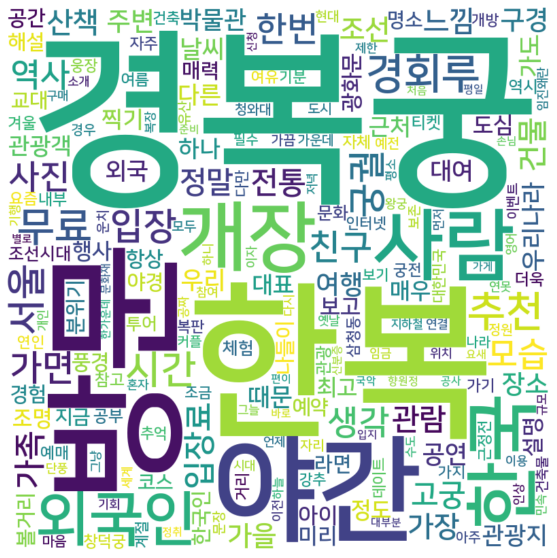

In [ ]:
review_total_count = get_word_count(review_total_token)
draw_word_cloud(review_total_count)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def tf_extractor(corpus): 
    # returns a frequency-based DTM
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,2))

    features = vectorizer.fit_transform(corpus) # transform texts to a frequency matrix
    return vectorizer, features

In [ ]:
positive_review = df[df['Label']==1]
negative_review = df[df['Label']==0]
positive_total_token, positive_total_sentence = get_cleaned_texts(positive_review)
negative_total_token, negative_total_sentence = get_cleaned_texts(negative_review)

In [ ]:
negative_review

,지역,loc,score,review,boolean,Label
45,서울,경복궁,30,야간개장 한다고 해서 갔는데 미리 예매를 해야 되어서 매진이 되었다 . 넓고 화려한...,False,0
101,서울,경복궁,20,대표인만큼 사람이 넘친다 유모차는 아주 비추 바퀴 고장날듯 사람이 많은 날도 비추 ...,False,0
108,서울,경복궁,30,가족이랑 같이 갔는데 하필 간날이 폭염이 와서 더워서 다 못보고 돌아왔네요 교대식도...,False,0
112,서울,경복궁,30,한 20여년 전만해도 경복궁은 사람들이 잘 찾지 않는 곳 중 하나였다. 우리문화에 ...,False,0
125,서울,경복궁,30,경복궁은 유명한 관광명소라서 외국인들과 한국인 관광객들이 수시로 드나든다. 그래서 ...,False,0
165,서울,경복궁,30,서울의 야경을 운치있게 감상하기에 좋은곳 특히 가을에는 낙엽과 돌담길이 어우러진 사...,False,0
166,서울,경복궁,30,"여러번 야간개장 방문을 준비하다 겨우 가 볼수 있었습니다. 웅장하고, 화려할꺼라 예...",False,0
177,서울,경복궁,30,"서울의 명소라서 항상 사람이 많고 외국인도 많지만 자주 가는곳 근처에 맛있는 식당,...",False,0
216,서울,경복궁,30,1. 사람이 많지만 그래도 한국에 오면 꼭 방문해야 합니다 2. 한국의 대표적인 역...,False,0
236,서울,경복궁,30,시간째우기 혹은 ㅛㅓ울놀러왓는데 할짓이 없으면 그냥 관광내는 기분 정도박에는 안댐 ...,False,0


In [ ]:
positive_vectorizer, positive_features = tf_extractor(positive_total_token)
negative_vectorizer, negative_features = tf_extractor(negative_total_token)

In [ ]:
positive_target = positive_review['Label']
negative_target = negative_review['Label']

total_vectorizer, total_features = tf_extractor(review_total_token)
total_target = df['Label']

In [ ]:
clf_1.fit(review_total_sentence, total_target)
clf_1.score(review_total_sentence, total_target)

0.9833333333333333

In [ ]:
import numpy as np
pred_labels = clf_1.predict(review_total_sentence)
np.where(pred_labels != total_target)
print(review_total_sentence[45])
print(review_total_sentence[165])
print(review_total_sentence[166])
print(review_total_sentence[216])
print(review_total_sentence[227])

야간 개장 미리 예매 매진 경복궁 매료 사람 한복 대여 학생 전통 가옥 예전 정취 야간 개장 사람 갈수 미리 예매 추천
서울 야경 운치 감상 가을 낙엽 돌담 길이 사진 찍기 무척 한국 고궁 더없이
야간 개장 방문 준비 겨우 웅장 예상 생각 감동 경주 안압지 야경
사람 한국 방문 한국 대표 역사 유물 세계 각국 사람 북적 근처 한복
규모 커서 웅장 느낌 내부 건축물 사극 이야기 한가지 주의 구가 보호 안내 문구 생각


In [ ]:
show_most_informative_features(clf_1)

	neg coef	word		pos coef	word
	-7.0121	관광명소           		-3.1001	경복궁            
	-7.0121	다음             		-3.3232	한복             
	-7.0121	방문객            		-3.6919	방문             
	-7.0121	식당             		-3.7540	야간             
	-7.0121	유모차            		-4.0503	개장             
	-7.0121	카페             		-4.0854	한국             
	-7.0121	학생             		-4.1034	사람             
	-6.7244	가까이            		-4.1217	외국인            
	-6.7244	가능             		-4.1987	경회루            
	-6.7244	가시             		-4.2606	무료             
	-6.7244	감동             		-4.3265	추천             
	-6.7244	감탄             		-4.4218	서울             
	-6.7244	거기             		-4.4472	시간             
	-6.7244	경북             		-4.4472	궁궐             
	-6.7244	계속             		-4.4731	입장             
	-6.7244	관람객            		-4.5554	가면             
	-6.7244	구조             		-4.5844	친구             
	-6.7244	국가             		-4.6142	한번             
	-6.7244	그것             		-4.6450	모습             
	-6.7244	기도         

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf_1 = Pipeline([('vect', CountVectorizer(min_df = 3 )), ('clf', MultinomialNB())])

In [ ]:
clf_1.fit(positive_total_sentence, positive_target) 
clf_1.score(positive_total_sentence, positive_target)

1.0

In [ ]:
def show_most_informative_features(pipeline, n=30):
    vectorizer = pipeline.steps[0][1]
    clf = pipeline.steps[1][1]
    feature_names = vectorizer.get_feature_names()
    coef = clf.coef_[0]
    coefs_with_fns = sorted(zip(coef, feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t{}\t{}\t\t{}\t{}".format('neg coef','word','pos coef','word'))
    pos_words = []
    neg_words = []
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        pos_words.append(fn_2)
        neg_words.append(fn_1)

In [ ]:
show_most_informative_features(clf_1)

	neg coef	word		pos coef	word
	-6.7169	가까이            		-3.0926	경복궁            
	-6.7169	가능             		-3.3157	한복             
	-6.7169	가시             		-3.6844	방문             
	-6.7169	감동             		-3.7465	야간             
	-6.7169	감탄             		-4.0427	개장             
	-6.7169	거기             		-4.0778	한국             
	-6.7169	경북             		-4.0959	사람             
	-6.7169	계속             		-4.1142	외국인            
	-6.7169	관람객            		-4.1912	경회루            
	-6.7169	구조             		-4.2530	무료             
	-6.7169	국가             		-4.3190	추천             
	-6.7169	그것             		-4.4143	서울             
	-6.7169	기도             		-4.4396	시간             
	-6.7169	기억             		-4.4396	궁궐             
	-6.7169	나름             		-4.4656	입장             
	-6.7169	나무             		-4.5478	가면             
	-6.7169	다시             		-4.5768	친구             
	-6.7169	도보             		-4.6067	한번             
	-6.7169	또한             		-4.6375	모습             
	-6.7169	마을         

[('오죽헌', 40), ('신사임당', 34), ('율곡', 25), ('방문', 23), ('이이', 23), ('박물관', 21), ('강릉', 21), ('역사', 20), ('아이', 18), ('생각', 17), ('대나무', 17), ('산책', 16), ('시간', 14), ('입장료', 13), ('율곡이이', 12), ('해설', 11), ('사람', 10), ('한번', 9), ('인물', 9), ('아주', 9), ('건물', 8), ('관람', 8), ('장소', 8), ('선생', 8), ('사임당', 8), ('설명', 7), ('생가', 7), ('교육', 7), ('지폐', 7), ('그림', 7), ('한국', 7), ('하나', 6), ('관광', 6), ('고택', 6), ('가면', 6), ('이야기', 6), ('정도', 6), ('모습', 6), ('조선시대', 5), ('사진', 5), ('주변', 5), ('입구', 5), ('아들', 5), ('관광지', 5), ('규모', 5), ('관리', 5), ('매우', 5), ('오죽', 5), ('대해', 5), ('실제', 5), ('의미', 5), ('공부', 5), ('학자', 5), ('어머니', 5), ('공원', 5), ('정말', 4), ('화폐', 4), ('가족', 4), ('추사', 4), ('김정희', 4), ('선생님', 4), ('볼거리', 4), ('처음', 4), ('투어', 4), ('이자', 4), ('기념관', 4), ('관광객', 4), ('가이드', 4), ('기억', 4), ('주말', 4), ('구경', 4), ('보기', 4), ('글씨', 4), ('그대로', 4), ('시립', 4), ('과거', 4), ('나무', 4), ('목조', 3), ('자체', 3), ('가장', 3), ('가옥', 3), ('경포대', 3), ('최초', 3), ('모자', 3), ('체험', 3), ('내부', 3), ('정리', 3), ('둘

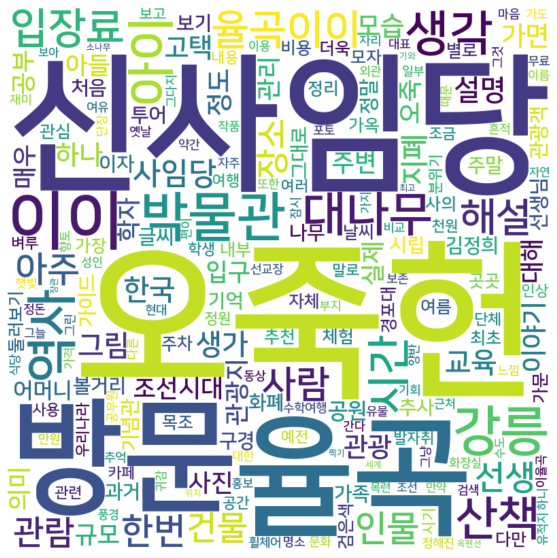

In [ ]:
gangwon = pd.read_csv('data_강원.csv')

gangwon_total_token, gangwon_total_sentence = get_cleaned_texts(gangwon)
gangwon_total_count = get_word_count(gangwon_total_token)
draw_word_cloud(gangwon_total_count)

In [ ]:
count = {}
for i,a in enumerate(gangwon_total_token):
  for b in gangwon_total_token[i+1:]:
    if a>b: 
      count[b,a] = count.get((b,a),0) + 1 
    else: 
      count[a,b] = count.get((a,b),0) + 1
df = pd.DataFrame.from_dict(count, orient='index')


In [ ]:
list1 = []
for i in range(len(df)):
  list1.append([df.index[i][0], df.index[i][1], df[0][i]])

df2 = pd.DataFrame(list1, columns=["term1", "term2", "freq"])
df3 = df2.sort_values(by=['freq'], ascending=False)

import networkx as nx 
import operator 

G = nx.Graph()

for i in range((len(np.where(df3['freq']>10)[0]))):
  G.add_edge(df3["term1"][i], df3['term2'][i], weight=int(df3['freq'][i]))

dgr = nx.degree_centrality(G)
btw = nx.betweenness_centrality(G)
cls = nx.closeness_centrality(G)
egv = nx.eigenvector_centrality(G)

In [ ]:
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

G_new = nx.Graph()

for i in range(len(sorted_cls)):
  G_new.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

for i in range((len(np.where(df3['freq']>10)[0]))):
  G_new.add_weighted_edges_from([df3['term1'][i], df3['term2'][i], df3['freq'][i])])

sizes = [G_new[node]['nodesize']*500 for node in G]
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True, 
    'font_weight': 'regular',
}

ValueError: ignored

[('대나무', 89), ('녹원', 29), ('정말', 27), ('담양', 26), ('산책', 23), ('사람', 18), ('나무숲', 17), ('가족', 16), ('생각', 15), ('방문', 14), ('중간', 14), ('느낌', 11), ('시간', 11), ('정도', 11), ('여름', 11), ('산책로', 10), ('힐링', 9), ('가면', 9), ('입장료', 8), ('추천', 8), ('걷기', 7), ('마음', 7), ('한번', 7), ('공원', 7), ('관광객', 6), ('기분', 6), ('자연', 6), ('이용', 6), ('곳도', 6), ('공간', 6), ('낙서', 5), ('주차', 5), ('관광', 5), ('연인', 5), ('떡갈비', 5), ('매우', 5), ('숲길', 5), ('사이', 5), ('예전', 5), ('입구', 5), ('코스', 5), ('사진', 5), ('길이', 5), ('바람', 5), ('둘레길', 4), ('조금', 4), ('여기', 4), ('후문', 4), ('볼거리', 4), ('근처', 4), ('겨울', 4), ('나무', 4), ('날씨', 4), ('공기', 4), ('대숲', 4), ('다만', 4), ('주변', 4), ('주차장', 4), ('장소', 4), ('언덕', 4), ('이름', 4), ('하나', 4), ('전체', 4), ('조성', 4), ('그늘', 4), ('소리', 4), ('구경', 4), ('카페', 4), ('가을', 4), ('휴식', 4), ('약간', 4), ('다른', 4), ('갈래', 4), ('명소', 3), ('천원', 3), ('정문', 3), ('무료', 3), ('곳곳', 3), ('부분', 3), ('지역', 3), ('시설', 3), ('친구', 3), ('기대', 3), ('풍경', 3), ('그냥', 3), ('택시', 3), ('체험', 3), ('찍기', 3), ('팬더',

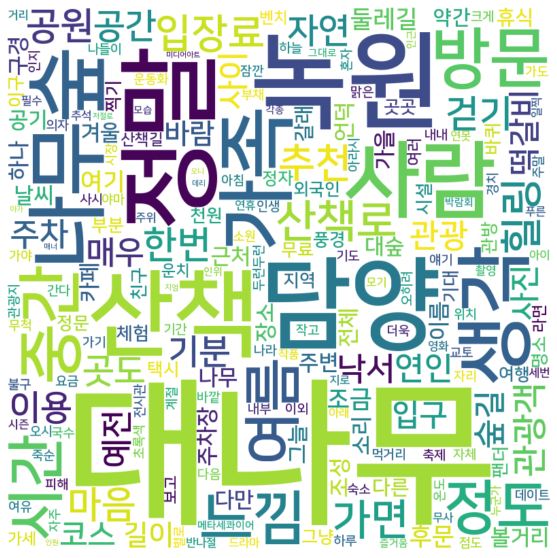

In [ ]:
jeonnam = pd.read_csv('data_전남.csv')

jeonnam_total_token, jeonnam_total_sentence = get_cleaned_texts(jeonnam)
jeonnam_total_count = get_word_count(jeonnam_total_token)
draw_word_cloud(jeonnam_total_count)